# Using logistic Regression on the Cancer data set

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# load the cancer data set in to the cancer variable
cancer = load_breast_cancer()

# Split the data set in to train,test
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

#initialize the logistic regression
logit = LogisticRegression()
# train the mmodel ny calling fit function
logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:

print ("Accuracy on the test set : {0:.2%}".format(logit.score(X_train,y_train)))
print ("Accuracy on the train set : {0:.2%}".format(logit.score(X_test,y_test)))


Accuracy on the test set : 95.31%
Accuracy on the train set : 95.80%


# Now we play a little with the parameters of logistic regression and draw some results from there

In [9]:
# parameter "C"
 ## Its a parameter to control the strength of the Regularization
    ## C lower adjusts to majority of the data point
    ## C higher does correct classification on each data point

logit_100 = LogisticRegression(C=100) 
logit_100.fit(X_train,y_train)
print ("Accuracy on the test set : {0:.2%}".format(logit_100.score(X_train,y_train)))
print ("Accuracy on the train set : {0:.2%}".format(logit_100.score(X_test,y_test)))


Accuracy on the test set : 97.18%
Accuracy on the train set : 96.50%


In [11]:
logit_001 = LogisticRegression(C=0.01) 
logit_001.fit(X_train,y_train)
print ("Accuracy on the test set : {0:.2%}".format(logit_001.score(X_train,y_train)))
print ("Accuracy on the train set : {0:.2%}".format(logit_001.score(X_test,y_test)))


Accuracy on the test set : 93.43%
Accuracy on the train set : 93.01%


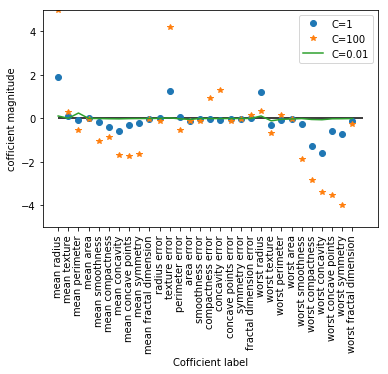

In [16]:
plt.plot(logit.coef_.T, 'o', label= 'C=1')
plt.plot(logit_100.coef_.T, '*', label= 'C=100')
plt.plot(logit_001.coef_.T, '-', label= 'C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation =90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('Cofficient label')
plt.ylabel('cofficient magnitude')
plt.legend()